    
# DATA DAY TRAINING: Intro to Python

## In this notebook, we will explore how life satisfaction varies with GDP per capita. 



### Data Source:

For this notebook, we access the WBG World Development Indicators API for countries' GDP per capita (PPP, current dollars) data for 2015. (https://data.worldbank.org/indicator/ny.gdp.pcap.cd) 

We also download the Better Life Index data for 2016 (BLI2016.csv) from the OECD Better Life Index (https://stats.oecd.org/Index.aspx?DataSetCode=BLI). 

Data definitions available at the end of this notebook.

### Importing libraries

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pyplot import figure
from pandas_datareader import wb

### Read data into a python dataframe (GDP per capita- PPP- current dollars, for countries in 2015 using the World Bank's World Development Indicators API)

In [123]:
GNI_capita_code = "NY.GNP.PCAP.CD"

In [124]:
country_list = wb.get_countries()

In [125]:
country_list=country_list[country_list.region!='Aggregates']

In [126]:
country_list.head(3)

,adminregion,capitalCity,iso3c,incomeLevel,iso2c,latitude,lendingType,longitude,name,region
0,,Oranjestad,ABW,High income,AW,12.51670,Not classified,-70.0167,Aruba,Latin America & Caribbean
1,South Asia,Kabul,AFG,Low income,AF,34.52280,IDA,69.1761,Afghanistan,South Asia
3,Sub-Saharan Africa (excluding high income),Luanda,AGO,Lower middle income,AO,-8.81155,IBRD,13.2420,Angola,Sub-Saharan Africa


In [127]:
country_list.shape

(218, 10)

In [128]:
countries = country_list.iso3c.tolist()
countries

['ABW',
 'AFG',
 'AGO',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHI',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CUW',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIB',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GRL',
 'GTM',
 'GUM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IMN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAF',
 'MAR',
 'MCO',
 'MDA',
 'MDG',
 'MDV',


In [129]:
reader = wb.WorldBankReader(symbols=[GNI_capita_code], countries = countries,start=2015,end=2015)
df1 = reader.read()

/anaconda3/lib/python3.7/site-packages/pandas_datareader/wb.py:134: UserWarning: Non-standard ISO country codes: CHI, XKX
  'country codes: %s' % tmp, UserWarning)


In [130]:
df1.shape

(217, 1)

In [131]:
df1.head()

,,NY.GNP.PCAP.CD
country,year,
Aruba,2015,23780.0
Afghanistan,2015,610.0
Angola,2015,4520.0
Albania,2015,4390.0
Andorra,2015,NaN


### Read data into a python dataframe (Life Satisfaction Score for countries in 2015 from the OECD's Better Life Index)

In [140]:
# Set path to the OECD dataset with data from 2015 on life satisfaction
PATH = '/Users/dharanarijal/Desktop/OECDY/BLI2015.csv'

In [141]:
# read csv file into a dataframe
df2 = pd.read_csv(PATH)

In [142]:
df2.shape

(3292, 17)

In [143]:
#names of all columns
print(df2.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')


In [144]:
#first five observations
df2.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.0,NaN,NaN


In [145]:
# creating a dataframe with only the columns needed
df2=df2[['LOCATION','Country','INDICATOR','Inequality','Unit','Value']]

In [146]:
# first five observations for this new dataframe
df2.head()

,LOCATION,Country,INDICATOR,Inequality,Unit,Value
0,AUS,Australia,HO_BASE,Total,Percentage,1.1
1,AUT,Austria,HO_BASE,Total,Percentage,1.0
2,BEL,Belgium,HO_BASE,Total,Percentage,2.0
3,CAN,Canada,HO_BASE,Total,Percentage,0.2
4,CZE,Czech Republic,HO_BASE,Total,Percentage,0.9


In [147]:
#renaming all columns so they're lowercase
df2.rename(columns={'LOCATION':'iso3c', 'Country':'country', 'INDICATOR':'indicator','Inequality':'inequality','Unit':'unit', 'Value':'value'}, 
                 inplace=True)

In [224]:
# subsetting dataframe with only those observations with 
# SW_LIFS (life satisfaction) under indicator & 
#'Total' under inequality (removing this condition can give us additional disaggregated scores for Men and Women)

df2=df2.loc[(df2['indicator'] == "SW_LIFS") & (df2['inequality'] == "Total")]

In [163]:
# first five observations in this dataframe
df2.head()

,iso3c,country,indicator,inequality,unit,value
2669,AUS,Australia,SW_LIFS,Total,Average score,7.3
2670,AUT,Austria,SW_LIFS,Total,Average score,6.9
2671,BEL,Belgium,SW_LIFS,Total,Average score,6.9
2672,CAN,Canada,SW_LIFS,Total,Average score,7.3
2673,CZE,Czech Republic,SW_LIFS,Total,Average score,6.5


In [164]:
### Merge the two dataframes on GDP per capita PPP (df1) and life satisfaction (df2)

In [165]:
# merging the dataframes derived from OECD (life satisfaction) and IMF (gdp_per_capita)
df=pd.merge(df1, df2, on='country')

In [166]:
# first five obvservatins of the merged dataset
df.head()

,country,NY.GNP.PCAP.CD,iso3c,indicator,inequality,unit,value
0,Australia,60360.0,AUS,SW_LIFS,Total,Average score,7.3
1,Austria,47630.0,AUT,SW_LIFS,Total,Average score,6.9
2,Belgium,44230.0,BEL,SW_LIFS,Total,Average score,6.9
3,Brazil,10090.0,BRA,SW_LIFS,Total,Average score,7.0
4,Canada,47460.0,CAN,SW_LIFS,Total,Average score,7.3


In [173]:
# renaming columns to be descriptive of what's stored in them

df.rename(columns={'NY.GNP.PCAP.CD':'gdp_per_capita','value':'life_sat_score'}, 
                 inplace=True)

In [223]:
# This is the clean dataframe we'll use for the analysis
df.head()

,country,gdp_per_capita,iso3c,indicator,inequality,unit,life_sat_score
0,Australia,60360.0,AUS,SW_LIFS,Total,Average score,7.3
1,Austria,47630.0,AUT,SW_LIFS,Total,Average score,6.9
2,Belgium,44230.0,BEL,SW_LIFS,Total,Average score,6.9
3,Brazil,10090.0,BRA,SW_LIFS,Total,Average score,7.0
4,Canada,47460.0,CAN,SW_LIFS,Total,Average score,7.3


In [177]:
df.shape

(34, 7)

# Now we can start exploring the data

In [180]:
#which country has maximum value for life satisfaction in 2015 
max_sat = (df[df.inequality == 'Total'].life_sat_score.idxmax())

print(df[df.inequality=='Total']
.loc[max_sat]
.country)

Switzerland


In [181]:
#what is the highest value for life satisfaction in 2015
df.loc[(df['inequality'] == 'Total'), 'life_sat_score'].max()

7.5

In [182]:
#profile of country with highest value for life satisfaction in 2015
df[df['inequality']=='Total'].loc[df[df['inequality']=='Total']['life_sat_score'].idxmax()]

country             Switzerland
gdp_per_capita            85780
iso3c                       CHE
indicator               SW_LIFS
inequality                Total
unit              Average score
life_sat_score              7.5
Name: 5, dtype: object

In [183]:
#profile of country with lowest value for life satisfaction in 2015
df[df['inequality']=='Total'].loc[df[df['inequality']=='Total']['life_sat_score'].idxmin()]

country                  Greece
gdp_per_capita            20360
iso3c                       GRC
indicator               SW_LIFS
inequality                Total
unit              Average score
life_sat_score              4.8
Name: 15, dtype: object

In [175]:
#Profile of country with the highest gdp per capita in 2015

df[df['inequality']=='Total'].loc[df[df['inequality']=='Total']['gdp_per_capita'].idxmax()]

country                  Norway
gdp_per_capita            93050
iso3c                       NOR
indicator               SW_LIFS
inequality                Total
unit              Average score
life_sat_score              7.4
Name: 25, dtype: object

In [176]:
#Profile of country with the lowest GDP per capita in 2015

df[df['inequality']=='Total'].loc[df[df['inequality']=='Total']['gdp_per_capita'].idxmin()]

country                  Mexico
gdp_per_capita             9840
iso3c                       MEX
indicator               SW_LIFS
inequality                Total
unit              Average score
life_sat_score              6.7
Name: 23, dtype: object

In [184]:
# when we don't filter for inequality=Total
df.loc[df['life_sat_score'].idxmax()]

country             Switzerland
gdp_per_capita            85780
iso3c                       CHE
indicator               SW_LIFS
inequality                Total
unit              Average score
life_sat_score              7.5
Name: 5, dtype: object

In [185]:
# summary stats
df.describe(include=['object', 'float64','int64'])

,country,gdp_per_capita,iso3c,indicator,inequality,unit,life_sat_score
count,34,34.000000,34,34,34,34,34.000000
unique,34,NaN,34,1,1,1,NaN
top,Slovenia,NaN,DEU,SW_LIFS,Total,Average score,NaN
freq,1,NaN,1,34,34,34,NaN
mean,NaN,38838.529412,NaN,NaN,NaN,NaN,6.623529
std,NaN,21572.463527,NaN,NaN,NaN,NaN,0.793557
min,NaN,9840.000000,NaN,NaN,NaN,NaN,4.800000
25%,NaN,18875.000000,NaN,NaN,NaN,NaN,6.025000
50%,NaN,40500.000000,NaN,NaN,NaN,NaN,6.900000
75%,NaN,49727.500000,NaN,NaN,NaN,NaN,7.300000


### Visualizing in a scatterplot

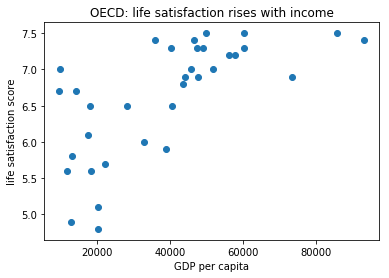

In [236]:
# Scatterplot with labels 
fig,ax = plt.subplots(figsize=[6,4])

ax.scatter(df.gdp_per_capita, df.life_sat_score)
ax.set(xlabel = 'GDP per capita', ylabel = 'life satisfaction score',title='OECD: life satisfaction rises with income');

### Another way

In [235]:
#turning life satisfaction score column into a list
life_sat=df.iloc[:, 6].tolist()
print(life_sat)

[7.3, 6.9, 6.9, 7.0, 7.3, 7.5, 6.7, 6.5, 7.0, 7.5, 6.5, 5.6, 7.4, 6.5, 6.8, 4.8, 4.9, 7.0, 7.5, 7.4, 6.0, 5.9, 6.9, 6.7, 7.3, 7.4, 7.3, 5.8, 5.1, 6.1, 5.7, 7.2, 5.6, 7.2]


In [204]:
#turning gdp per capita column into a list
income=df[df['inequality']=='Total'].iloc[:, 1].tolist()
print (income)

[60360.0, 47630.0, 44230.0, 10090.0, 47460.0, 85780.0, 14310.0, 18250.0, 45790.0, 60170.0, 28420.0, 18380.0, 46630.0, 40730.0, 43720.0, 20360.0, 12960.0, 51850.0, 49960.0, 36080.0, 32970.0, 38880.0, 73530.0, 9840.0, 49030.0, 93050.0, 40270.0, 13340.0, 20440.0, 17580.0, 22240.0, 57880.0, 12000.0, 56300.0]


In [205]:
#turning country column into a list
country=df[df['inequality']=='Total'].iloc[:, 0].tolist()
print(country)

['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Switzerland', 'Chile', 'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom', 'Greece', 'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Mexico', 'Netherlands', 'Norway', 'New Zealand', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Sweden', 'Turkey', 'United States']


<function matplotlib.pyplot.show(*args, **kw)>

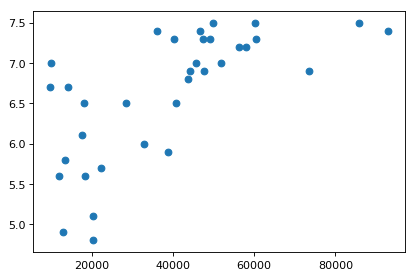

In [232]:
#scatterplot of life satisfaction against gdp

figure(num=None, figsize=(6,4), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(income,lifesat)
plt.show

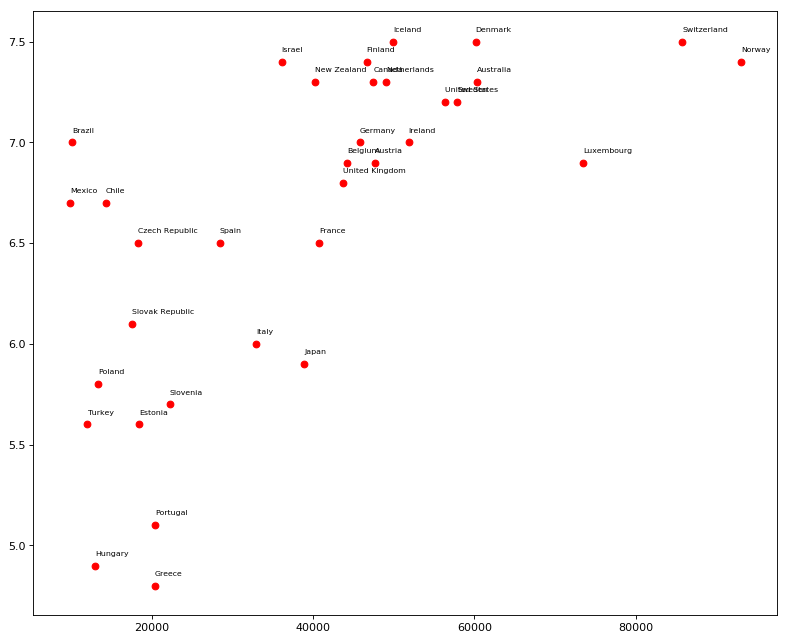

In [207]:
#annotated with country names

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

for i,type in enumerate(country):
    inc = income[i]
    lif = lifesat[i]
    plt.scatter(inc, lif, color='red')
    plt.text(inc+0.05, lif+0.05, type, fontsize=7)
plt.show()

### Regression

In [218]:
y = df.life_sat_score
X = df.gdp_per_capita

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.params

const             5.659271
gdp_per_capita    0.000025
dtype: float64

In [248]:
#Constant
model.params[0]

5.659270687923524

In [250]:
#Coefficient for GDP per capita
model.params[1]

2.482737473445884e-05

In [220]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         life_sat_score   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     26.77
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.20e-05
Time:                        13:19:12   Log-Likelihood:                -29.540
No. Observations:                  34   AIC:                             63.08
Df Residuals:                      32   BIC:                             66.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6593      0.212     26.639      0.000       5.227       6.092
gdp_per_capita  2.483e-05    4.8e-06      5.174      0.000    1.51e-05    3.46e-05
==============================================================================
Omnibus:                        1.115   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                          -0.390   Prob(JB):                        0.591
Kurtosis:                       2.635   Cond. No.                     9.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

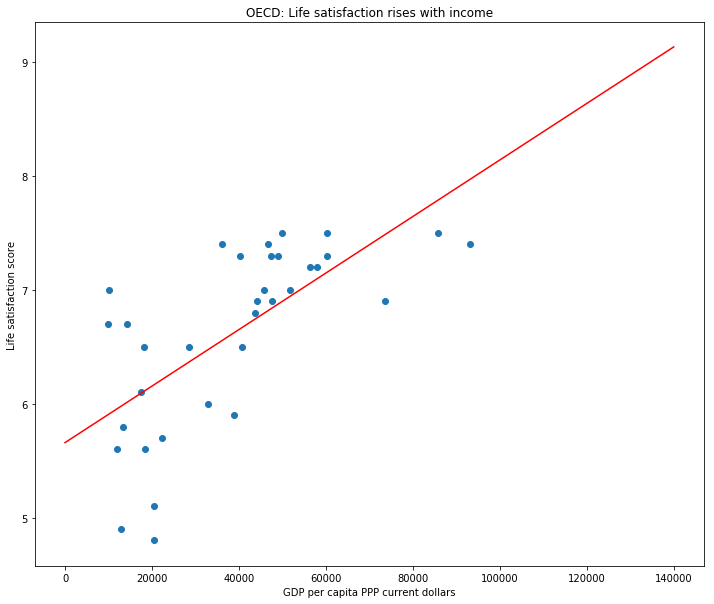

In [252]:
fig,ax = plt.subplots(figsize=[12, 10])

ax.scatter(df.gdp_per_capita, df.life_sat_score)
ax.set(xlabel = 'GDP per capita PPP current dollars', ylabel = 'Life satisfaction score',title='OECD: Life satisfaction rises with income');

X_plot = np.linspace(0,140000,1000)
ax.plot(X_plot, X_plot*model.params[1]+ model.params[0],color='r');

# Data Definition:

## GDP per capita (current US dollars)

Indicator ID: NY.GDP.PCAP.CD

GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

Source: World Bank national accounts data, and OECD National Accounts data files.

## Life satisfaction (Subjective well-being) 

Life satisfaction

Indicator ID=SW_LIFS

The indicator considers people's evaluation of their life as a whole. It is a weighted-sum of different
response categories based on people's rates of their current life relative to the best and worst possible
lives for them on a scale from 0 to 10, using the Cantril Ladder (known also as the "Self-Anchoring Striving
Scale")
Unit of measurement: Mean value (Cantril Ladder)
Additional information: Gender inequality (men versus women); Socio-economic inequality
(educational attainment 5/6 ISCED group versus 0/1 ISCED group)
Source: OECD calculations based on Gallup World Poll

